<a href="https://colab.research.google.com/github/MerciaAquino/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
%pip install pandas matplotlib numpy

# Importação de biblioteca panda, numpy e matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample .csv to sales_data_sample .csv


In [47]:
#Carregamento de Arquivo indicado em .CSV
df = pd.read_csv('sales_data_sample .csv', encoding='latin1')
# Visualizarr as primeiras linhas
df.head()



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [48]:
# Lista de produtos
produtos = df['PRODUCTLINE'].unique().tolist()
print(produtos)



['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars', 'Planes', 'Ships', 'Trains']


In [72]:
# Lista as categorias únicas de linha de produto
linhas = df['PRODUCTLINE'].unique().tolist()

# Total de vendas por linha de produto
vendas_dict = {linha: df[df['PRODUCTLINE'] == linha]['SALES'].sum() for linha in linhas}

print("Total de vendas por linha de produto:")
for produto, total in vendas_dict.items():
    print(f"- {produto}: R$ {total:,.2f}")

Total de vendas por linha de produto:
- Motorcycles: R$ 1,166,388.34
- Classic Cars: R$ 3,919,615.66
- Trucks and Buses: R$ 1,127,789.84
- Vintage Cars: R$ 1,903,150.84
- Planes: R$ 975,003.57
- Ships: R$ 714,437.13
- Trains: R$ 226,243.47


In [73]:

#  > e < valor de venda
maior_menor_venda = (df['SALES'].max(), df['SALES'].min())
print(maior_menor_venda)

(14082.8, 482.13)


In [75]:
# Categorização d vendas
for index, row in df.iterrows():
    if row['SALES'] > 3000:
        categoria = 'Alta'
    elif row['SALES'] > 2000:
        categoria = 'Média'
    else:
        categoria = 'Baixa'
    df.loc[index, 'CATEGORIA_VENDA'] = categoria
#Resultado
df[['SALES', 'CATEGORIA_VENDA']].head()

,SALES,CATEGORIA_VENDA
0,2871.00,Média
1,2765.90,Média
2,3884.34,Alta
3,3746.70,Alta
4,5205.27,Alta


In [76]:

#Coluna com lucro estimado _ considerado 20%
df['LUCRO'] = df['SALES'] * 0.20
df.head ()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CATEGORIA_VENDA,LUCRO
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Média,574.200
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Média,553.180
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Alta,776.868
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Alta,749.340
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Alta,1041.054


In [80]:
# Alterar nome de coluna
df.rename(columns={'ORDERDATE': 'DATA_PEDIDO'}, inplace=True)
df.head ()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DATA_PEDIDO,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CATEGORIA_VENDA,LUCRO
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Média,574.200
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Média,553.180
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Alta,776.868
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Alta,749.340
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Alta,1041.054


In [81]:
# Convertendo data p padrão aa-mm-dd
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])
df.head (
)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DATA_PEDIDO,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CATEGORIA_VENDA,LUCRO
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Média,574.200
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Média,553.180
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Alta,776.868
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Alta,749.340
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Alta,1041.054


In [82]:
#Matrizes - Numpy
vendas_array = np.array(df['SALES'])

media = np.mean(vendas_array)
desvio = np.std(vendas_array)

print(f"Média das vendas: {media:.2f}")
print(f"Desvio padrão: {desvio:.2f}")

Média das vendas: 3553.89
Desvio padrão: 1841.54


In [92]:
# Filtro: vendas adima de  3000
vendas_altas = df[df['SALES'] > 3000]
df .head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DATA_PEDIDO,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CATEGORIA_VENDA,LUCRO
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Média,574.200
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Média,553.180
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Alta,776.868
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Alta,749.340
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Alta,1041.054


In [93]:

# Agrupamento por país
vendas_pais = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print(vendas_pais)


COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64


In [94]:

# Resumo estatístico
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DATA_PEDIDO,QTR_ID,MONTH_ID,YEAR_ID,MSRP,LUCRO
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551,710.777814
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000,96.426000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000,440.686000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000,636.960000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000,901.600000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000,2816.560000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912,368.373021


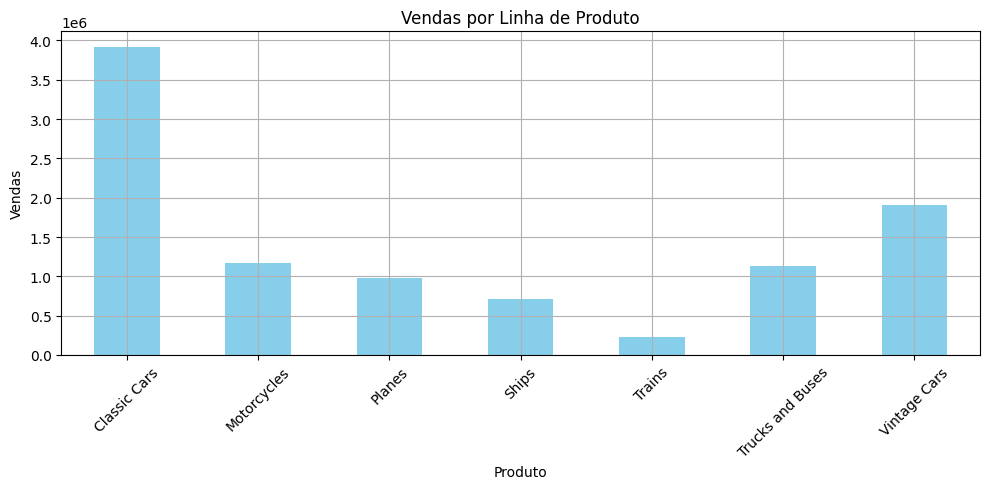

In [71]:
#  Matplotlib ( Grafico de colunas)
df.groupby('PRODUCTLINE')['SALES'].sum().plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Vendas por Linha de Produto')
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

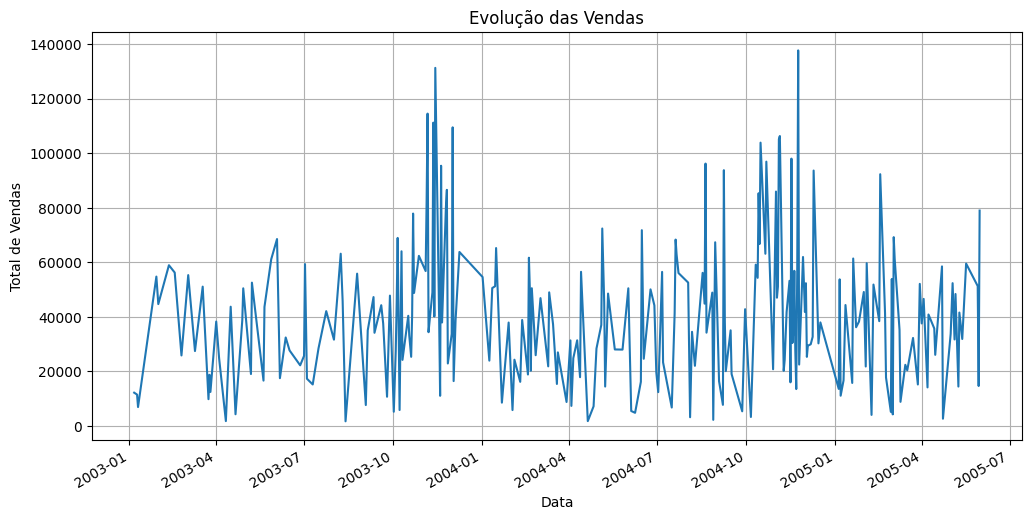

In [72]:

#  Matplotlib ( Grafico de linhas)
df.sort_values('DATA_PEDIDO', inplace=True)
df.groupby('DATA_PEDIDO')['SALES'].sum().plot(figsize=(12,6))
plt.title('Evolução das Vendas')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()


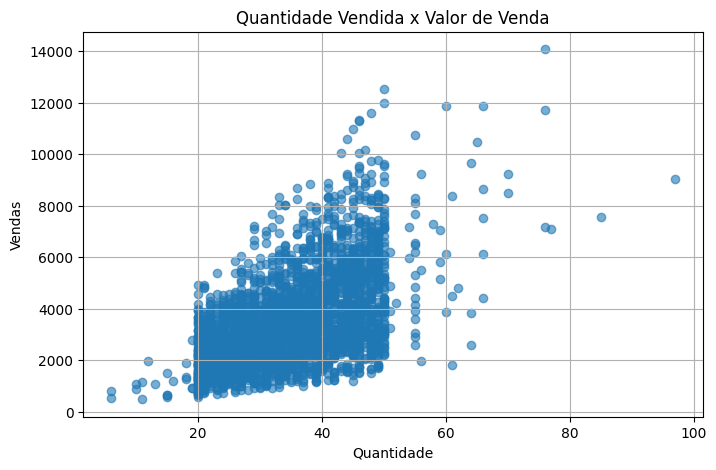

In [95]:
#  Matplotlib ( Grafico de dispérsão)
plt.figure(figsize=(8,5))
plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.6)
plt.title('Quantidade Vendida x Valor de Venda')
plt.xlabel('Quantidade')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()


Busquei pesquisar mais durante o projeto, o que possibilitou outros vieses de conhecimento, ideal para abrir frentes de pesquisas futuras e mergulhar no mundo de Python.

Quanto à analise da base do projeto, país que apresentou maior participação em vendas foi USA com 3627982.83 e produto que necessita de atenção  é "Trains", quanto à performance (pode ser por penetração de mercado ou valor agregado, o que nos direciona a ampliar projeto).